In [39]:
import json
import os
import sys

dataset = 'medqa'

In [ ]:
from preprocess.data_map import map_concept_ner

files_path = os.path.join(os.getcwd(), 'data', dataset, 'raw')

for fname in ['dev', 'test', 'train']:
    file_path = os.path.join(files_path, fname + '.jsonl')
    # print(file_path)
    map_concept_ner('spacy', file_path, dataset, test_metamap=False)

In [40]:
from preprocess.data_subgraph import build_subgraph

files_path = os.path.join(os.getcwd(), 'data', dataset, 'mapped')

for fname in ['dev', 'test', 'train']:
    file_path = os.path.join(files_path, fname + '.jsonl')
    # print(file_path)
    build_subgraph(file_path, dataset, test_subgraph=False)

100%|██████████| 1272/1272 [21:54<00:00,  1.03s/it]


grounded concepts saved to /Users/soulofshadow/Downloads/UMLS/data/medqa/subgraphed/dev.jsonl



100%|██████████| 1273/1273 [24:55<00:00,  1.17s/it]


grounded concepts saved to /Users/soulofshadow/Downloads/UMLS/data/medqa/subgraphed/test.jsonl



100%|██████████| 10178/10178 [3:17:42<00:00,  1.17s/it] 


grounded concepts saved to /Users/soulofshadow/Downloads/UMLS/data/medqa/subgraphed/train.jsonl



#### Test

In [11]:
from preprocess.data_subgraph import load_resources, load_cpnet
import pickle
import networkx as nx

#load concepts
concepts_file = "./data/umls/concepts.txt"
id2concept = [w.strip() for w in open(concepts_file)]
concept2id = {w: i for i, w in enumerate(id2concept)}

#load concept to name
concept2name_file = "./data/umls/concept_names.txt"
concept2name = {}
for line in open(concept2name_file):
    c, n = line.strip().split('\t')
    concept2name[c] = n

#load relation
relation_file = "./data/umls/relations.txt"
id2relation = [r.strip() for r in open(relation_file)]
relation2id = {r: i for i, r in enumerate(id2relation)}

In [12]:
NET = nx.MultiGraph()
graph_file = './data/umls/umls.graph'
with open(graph_file, 'rb') as f:
    NET = pickle.load(f)

In [13]:
data = []
import json

with open('./data/medqa/mapped/dev.jsonl', 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

In [14]:
concept = [d['concept'] for d in data]
option_graph = [None] * len(concept)
option0 = [d['option0'] for d in data]
option1 = [d['option1'] for d in data]
option2 = [d['option2'] for d in data]
option3 = [d['option3'] for d in data]
options = [list(pair) for pair in zip(option_graph, option0, option1, option2, option3)]

In [15]:
from itertools import chain

flat_list = [item for sublist in options[0] if sublist is not None for item in sublist]
flat_list

['C3854019', 'C0008809', 'C0007561', 'C0041041']

In [25]:
qc_id = [concept2id[c] for c in concept[0] if c in id2concept]
if flat_list is not None:
    ac_id = [concept2id[c] for c in flat_list if c in id2concept]
else:
    ac_id = []

qc_neigbor = {}
for n in qc_id:
    if n in NET.nodes():
        qc_neigbor[n] = set(NET.neighbors(n))
    else:
        qc_neigbor[n] = set()

ac_neigbor = {}
for n in ac_id:
    if n in NET.nodes():
        ac_neigbor[n] = set(NET.neighbors(n))
    else:
        ac_neigbor[n] = set()

linked_qc_nodes = set()
extra_nodes = set()
for ac_node in ac_id:
    for qc_node in qc_id:
        hop2_nodes = set(ac_neigbor[ac_node]) & set(qc_neigbor[qc_node]) 
        if hop2_nodes:
            linked_qc_nodes.add(qc_node)
            extra_nodes |= hop2_nodes

all_graph_nodes = list(set(ac_id).union(extra_nodes, linked_qc_nodes))

In [30]:
import itertools
origin_nodes = set(ac_id) | set(qc_id)
neibors = {}
for n in origin_nodes:
    if n in NET.nodes():
        neibors[n] = set(NET.neighbors(n))
    else:
        neibors[n] = set()
for a, b in itertools.combinations(origin_nodes, 2):
    extra_nodes |= set(neibors[a]) & set(neibors[b]) 
extra_nodes = extra_nodes - origin_nodes

In [31]:
extra_nodes = list(extra_nodes - set(all_graph_nodes))

In [35]:
all_nodes = all_graph_nodes + extra_nodes

In [37]:
unique_list = list(dict.fromkeys(all_nodes))

In [38]:
len(unique_list)

425

In [36]:
len(all_nodes)

425

In [34]:
list1 = [1, 2, 3]
list2 = [3, 5, 6]

combined_list = list1 + list2
print(combined_list)
# 输出: [1, 2, 3, 4, 5, 6]


[1, 2, 3, 3, 5, 6]


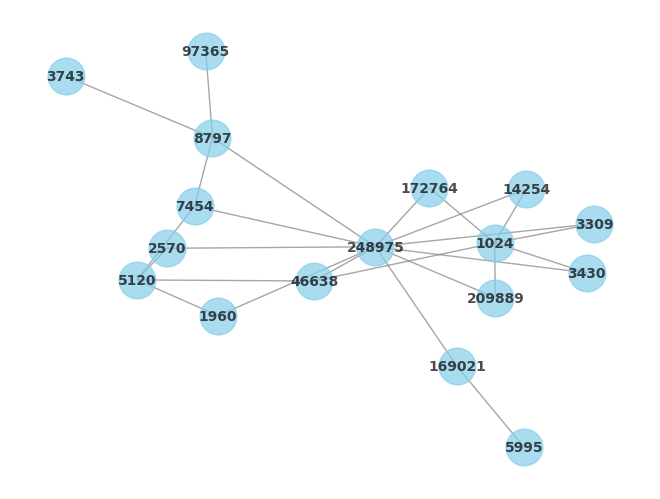

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个简单的无向图
G = nx.Graph()

# 添加节点
G.add_nodes_from(all_graph_nodes)

# 添加边
G.add_edges_from(edges_list)

# 绘制图形
pos = nx.spring_layout(G)  # 选择一种布局算法，这里使用弹簧布局
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)

# 显示图形
plt.show()


In [81]:
concept2name[id2concept[248975]]

'Gentamicin'

In [82]:
concept2name[id2concept[97365]]

'Fever symptoms'

In [83]:
concept2name[id2concept[8797]]

'Septicemia'

In [59]:
 #subgraph
data_g = []
with open('./data/medqa/subgraphed/dev.jsonl', 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data_g.append(json_obj)

In [64]:
len(data_g[0])

5